<a href="https://colab.research.google.com/github/Bala-Vignesh-S-M/fakexts/blob/main/Fakexts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC 
from nltk.corpus import stopwords
import nltk
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
df_fake = pd.read_csv('/content/Fake.csv')
df_real = pd.read_csv('/content/Real.csv')
#testing = pd.read_csv('/content/Testing_data_X.csv')
df_fake

,Unnamed: 0,0
0,0,trump warns of vote flipping on machines
1,1,this election is not about trump its about a g...
2,2,more on trump populism and how it can be contr...
3,3,trump bollywood ad meant to sway indian americ...
4,4,dems could be up on charges for inciting trump...
...,...,...
1090,1090,what happens if trump loses the election what ...
1091,1091,latest poll shows trump with 4 point lead in f...
1092,1092,breaking donald trump makes major clinton indi...
1093,1093,no hate crimes have not intensified since trum...


In [3]:
df_fake.rename( columns={'Unnamed: 0':'id'}, inplace=True )
df_real.rename( columns={'Unnamed: 0':'id'}, inplace=True )
#testing.rename( columns={'Unnamed: 0':'id'}, inplace=True )

In [4]:
df_fake = df_fake.drop(['id'], axis = 1)
df_real = df_real.drop(['id'], axis = 1)
#testing = testing.drop(['id'], axis = 1)
df_real

,0
0,donald trump do you remember the year since he...
1,trump defends son over emails as moscow hits back
2,donald trump strategist says media wont easily...
3,anthony scaramucci who is donald trumps new co...
4,donald trumps mobile phone use worries securit...
...,...
1565,trump repeatedly demeaned women on hit show th...
1566,donald trump tells guam north korean threat a ...
1567,cancel it trump says new air force one cost ri...
1568,trump trade policies easier said than done


In [5]:
df_fake['nature'] = 0
df_real['nature'] = 1

In [6]:
df_fake

,0,nature
0,trump warns of vote flipping on machines,0
1,this election is not about trump its about a g...,0
2,more on trump populism and how it can be contr...,0
3,trump bollywood ad meant to sway indian americ...,0
4,dems could be up on charges for inciting trump...,0
...,...,...
1090,what happens if trump loses the election what ...,0
1091,latest poll shows trump with 4 point lead in f...,0
1092,breaking donald trump makes major clinton indi...,0
1093,no hate crimes have not intensified since trum...,0


In [7]:
df_real

,0,nature
0,donald trump do you remember the year since he...,1
1,trump defends son over emails as moscow hits back,1
2,donald trump strategist says media wont easily...,1
3,anthony scaramucci who is donald trumps new co...,1
4,donald trumps mobile phone use worries securit...,1
...,...,...
1565,trump repeatedly demeaned women on hit show th...,1
1566,donald trump tells guam north korean threat a ...,1
1567,cancel it trump says new air force one cost ri...,1
1568,trump trade policies easier said than done,1


In [8]:
frames = [df_real,df_fake]
df = pd.concat(frames)
df = shuffle(df)
df.rename( columns={'0':'Features'}, inplace=True )
df

,Features,nature
707,breaking plot to kill trump revealed he needs ...,0
1299,trump in israel just got back from the middle ...,1
986,julie bishop would be taken aback by donald tr...,1
337,october surprise abc uncovers millions of paym...,0
317,7 things you need to know about trump attorney...,0
...,...,...
916,chairman of the house oversight and government...,0
547,more evidence george soros is behind the anti ...,0
934,donald trump rebuked by republicans,1
1213,brexit bowie trump ali take a look back at the,1


In [9]:
df['Features'] = df['Features'].apply(lambda x: x.lower())
df

,Features,nature
707,breaking plot to kill trump revealed he needs ...,0
1299,trump in israel just got back from the middle ...,1
986,julie bishop would be taken aback by donald tr...,1
337,october surprise abc uncovers millions of paym...,0
317,7 things you need to know about trump attorney...,0
...,...,...
916,chairman of the house oversight and government...,0
547,more evidence george soros is behind the anti ...,0
934,donald trump rebuked by republicans,1
1213,brexit bowie trump ali take a look back at the,1


In [10]:
# Removing punctuation from the texts
import string

def punctuation_removal(Features):
    all_list = [char for char in Features if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['Features'] = df['Features'].apply(punctuation_removal)
df

,Features,nature
707,breaking plot to kill trump revealed he needs ...,0
1299,trump in israel just got back from the middle ...,1
986,julie bishop would be taken aback by donald tr...,1
337,october surprise abc uncovers millions of paym...,0
317,7 things you need to know about trump attorney...,0
...,...,...
916,chairman of the house oversight and government...,0
547,more evidence george soros is behind the anti ...,0
934,donald trump rebuked by republicans,1
1213,brexit bowie trump ali take a look back at the,1


In [11]:
#Removing numbers from texts

def remove_numbers(Features):
    numbers='0123456789'
    all_list = [char for char in Features if char not in numbers]
    clean_str = ''.join(all_list)
    return clean_str

df['Features'] = df['Features'].apply(remove_numbers)
df

,Features,nature
707,breaking plot to kill trump revealed he needs ...,0
1299,trump in israel just got back from the middle ...,1
986,julie bishop would be taken aback by donald tr...,1
337,october surprise abc uncovers millions of paym...,0
317,things you need to know about trump attorney ...,0
...,...,...
916,chairman of the house oversight and government...,0
547,more evidence george soros is behind the anti ...,0
934,donald trump rebuked by republicans,1
1213,brexit bowie trump ali take a look back at the,1


In [12]:
# Removing stopwords from texts
nltk.download('stopwords')
stop = stopwords.words('english')
df['Features'] = df['Features'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Features,nature
707,breaking plot kill trump revealed needs support,0
1299,trump israel got back middle east,1
986,julie bishop would taken aback donald trump bo...,1
337,october surprise abc uncovers millions payment...,0
317,things need know trump attorney general pick j...,0


In [13]:
df.head()

,Features,nature
707,breaking plot kill trump revealed needs support,0
1299,trump israel got back middle east,1
986,julie bishop would taken aback donald trump bo...,1
337,october surprise abc uncovers millions payment...,0
317,things need know trump attorney general pick j...,0


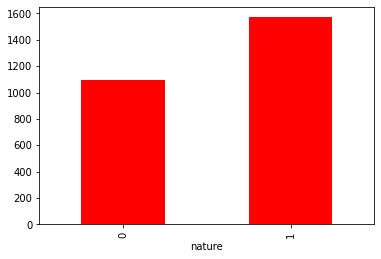

In [14]:
df.groupby('nature').Features.count().plot.bar(ylim=0, color = 'red')
plt.show()

In [15]:
y = df['nature'].copy()

In [16]:
y.value_counts(normalize=True,sort=False)

0    0.410882
1    0.589118
Name: nature, dtype: float64

In [17]:
# cv = CountVectorizer(max_features=3000, min_df=5, max_df=0.7)
# corpus=df['Features']
# X = cv.fit_transform(corpus).toarray()

In [18]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
corpus=df['Features']
X = cv.fit_transform(corpus).toarray()
X[0][351]

0

In [19]:
# len(cv.get_feature_names())

In [20]:
# cv.get_feature_names().index('border')

In [21]:
# cv.vocabulary_

In [22]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidfconverter = TfidfTransformer()
# X = tfidfconverter.fit_transform(X).toarray()

In [23]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidfconverter = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.7)
# corpus=df['Features']
# X = tfidfconverter.fit_transform(corpus).toarray()

In [24]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'red')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

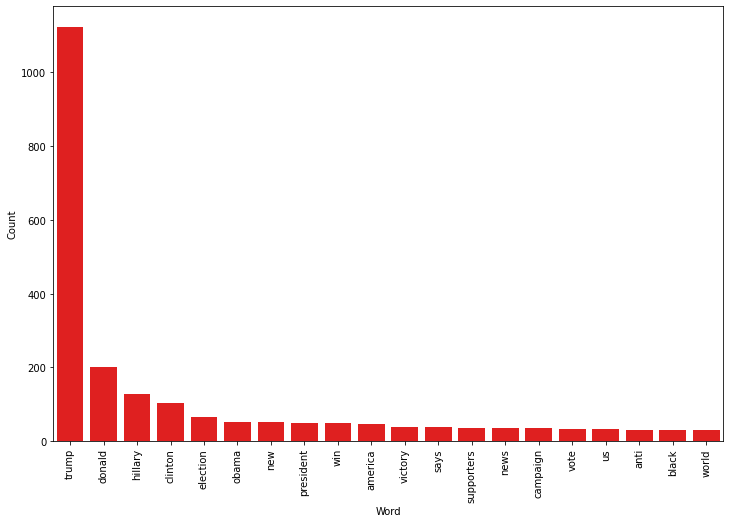

In [25]:
# Most frequent words in class 0
counter(df[df["nature"] == 0], "Features", 20)

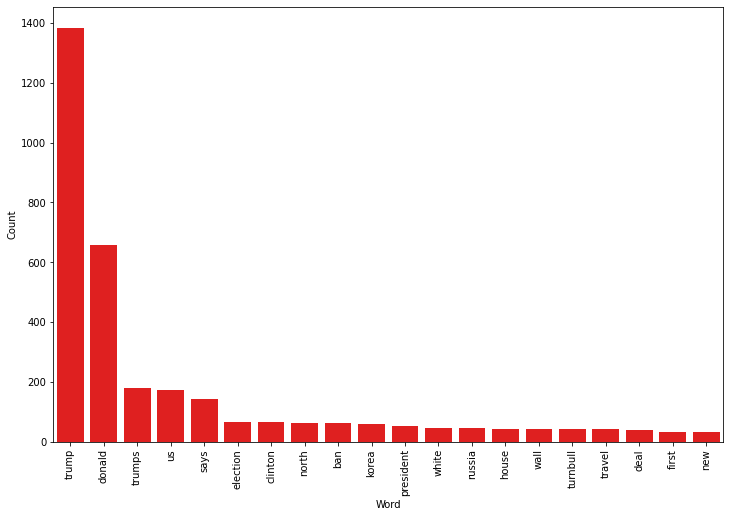

In [26]:
# Most frequent words in class 1
counter(df[df["nature"] == 1], "Features", 20)

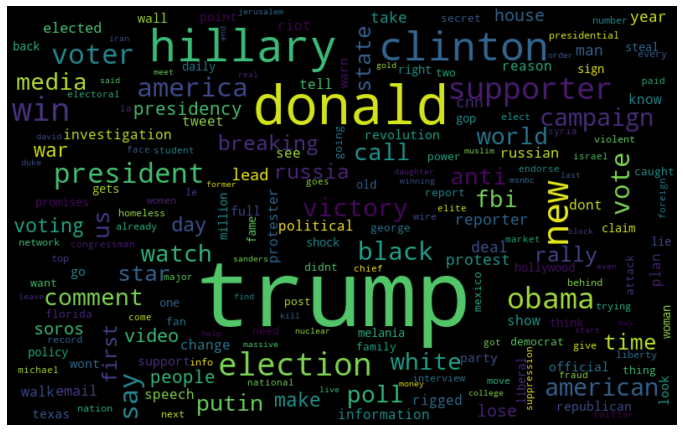

In [27]:
#word cloud for class 0
from wordcloud import WordCloud

df0= df[df["nature"] == 0]
all_words = ' '.join([Features for Features in df0.Features])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

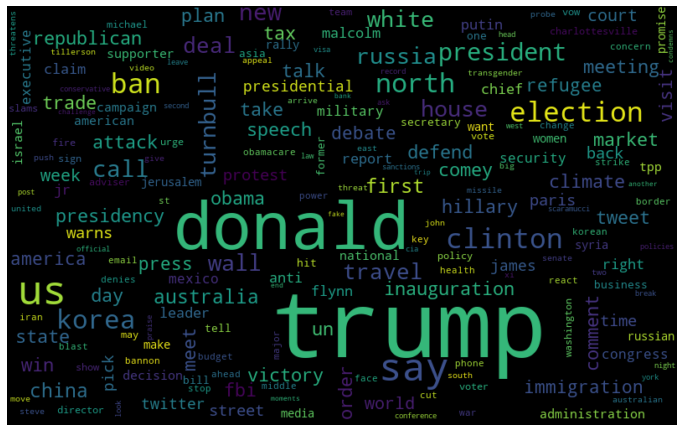

In [28]:
#word cloud for class 0
from wordcloud import WordCloud

df0= df[df["nature"] == 1]
all_words = ' '.join([Features for Features in df0.Features])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
models = {}
AUC = {}

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# **ML Models**

## **PERCEPTRON**

In [31]:
perceptron=Perceptron()
perceptron.fit(x_train,y_train)
pred=perceptron.predict(x_test)

In [32]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

In [33]:
print(perceptron.score(x_test, y_test))

0.78625


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       332
           1       0.86      0.75      0.81       468

    accuracy                           0.79       800
   macro avg       0.78      0.79      0.78       800
weighted avg       0.80      0.79      0.79       800



In [35]:
auc_score1 = roc_auc_score(y_test, pred)
print(auc_score1)

0.7927994027391617


In [36]:
models[1] =['Perceptron', perceptron.score(x_test, y_test)] 
models

{1: ['Perceptron', 0.78625]}

In [37]:
AUC[1] =['Perceptron', auc_score1] 
AUC

{1: ['Perceptron', 0.7927994027391617]}

## **LOGISTIC REGRESSION**

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_log=lr.predict(x_test)

In [39]:
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_log, pos_label=1)

In [40]:
auc_score2 = roc_auc_score(y_test, pred_log)
print(auc_score2)

0.809146843785398


In [41]:
print(lr.score(x_test, y_test))

0.82125


In [42]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       332
           1       0.83      0.88      0.85       468

    accuracy                           0.82       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.82      0.82      0.82       800



In [43]:
AUC[2] =['Logistic regression', auc_score2] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398]}

In [44]:
models[2] =['Logistic Regression', lr.score(x_test, y_test)] 
models

{1: ['Perceptron', 0.78625], 2: ['Logistic Regression', 0.82125]}

## **DECISION TREE CLASSIFIER**

In [45]:
dclf = DecisionTreeClassifier()
dclf.fit(x_train, y_train)
pred_dt=dclf.predict(x_test)

In [46]:
print(dclf.score(x_test, y_test))

0.65


In [47]:
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_dt, pos_label=1)

In [48]:
auc_score3 = roc_auc_score(y_test, pred_dt)
print(auc_score3)

0.6636546184738955


In [49]:
AUC[3] =['Decision Tree', auc_score3] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955]}

In [50]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       332
           1       0.76      0.58      0.66       468

    accuracy                           0.65       800
   macro avg       0.66      0.66      0.65       800
weighted avg       0.68      0.65      0.65       800



In [51]:
models[3] =['Decision Tree', dclf.score(x_test, y_test)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65]}

## **RANDOM FOREST CLASSIFIER**

In [52]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

In [53]:
y_pred = regressor.predict(x_test)
for i in range(len(y_pred)):
  if y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0


In [54]:
print(accuracy_score(y_test, y_pred))

0.72


In [55]:
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred, pos_label=1)

In [56]:
auc_score4 = roc_auc_score(y_test, y_pred)
print(auc_score4)

0.7287354546390692


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       332
           1       0.81      0.68      0.74       468

    accuracy                           0.72       800
   macro avg       0.72      0.73      0.72       800
weighted avg       0.74      0.72      0.72       800



In [58]:
AUC[4] =['Randon Forest Classifier', auc_score4] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955],
 4: ['Randon Forest Classifier', 0.7287354546390692]}

In [59]:
models[4] =['Random Forest Regressor', accuracy_score(y_test, y_pred)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65],
 4: ['Random Forest Regressor', 0.72]}

# **SUPPORT VECTOR MACHINES**

## **LINEAR KERNAL**

In [60]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [61]:
pred_lin = svclassifier.predict(x_test)

In [62]:
print(accuracy_score(y_test,y_pred=pred_lin))

0.80125


In [63]:
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_lin, pos_label=1)

In [64]:
auc_score5 = roc_auc_score(y_test, pred_lin)
print(auc_score5)

0.792052826691381


In [65]:
print(classification_report(y_test,pred_lin))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       332
           1       0.82      0.85      0.83       468

    accuracy                           0.80       800
   macro avg       0.80      0.79      0.79       800
weighted avg       0.80      0.80      0.80       800



In [66]:
AUC[5] =['svm linear', auc_score5] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955],
 4: ['Randon Forest Classifier', 0.7287354546390692],
 5: ['svm linear', 0.792052826691381]}

In [67]:
models[5] =['svclassifier lin', accuracy_score(y_test, pred_lin)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65],
 4: ['Random Forest Regressor', 0.72],
 5: ['svclassifier lin', 0.80125]}

## **POLYNOMIAL KERNAL**

In [68]:
svclassifier = SVC(kernel='poly', degree=4)
svclassifier.fit(x_train, y_train)

SVC(degree=4, kernel='poly')

In [69]:
pred_poly = svclassifier.predict(x_test)

In [70]:
print(accuracy_score(y_test,y_pred=pred_poly))

0.6225


In [71]:
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_poly, pos_label=1)

In [72]:
auc_score6 = roc_auc_score(y_test, pred_poly)
print(auc_score6)

0.5451807228915663


In [73]:
print(classification_report(y_test,pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17       332
           1       0.61      1.00      0.76       468

    accuracy                           0.62       800
   macro avg       0.80      0.55      0.46       800
weighted avg       0.77      0.62      0.51       800



In [74]:
AUC[6] =['svm poly', auc_score6] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955],
 4: ['Randon Forest Classifier', 0.7287354546390692],
 5: ['svm linear', 0.792052826691381],
 6: ['svm poly', 0.5451807228915663]}

In [75]:
models[6] =['svclassifier poly', accuracy_score(y_test, pred_poly)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65],
 4: ['Random Forest Regressor', 0.72],
 5: ['svclassifier lin', 0.80125],
 6: ['svclassifier poly', 0.6225]}

## **SIGMOID KERNAL**

In [76]:
svclassifier = SVC(kernel='sigmoid', degree=4)
svclassifier.fit(x_train, y_train)

SVC(degree=4, kernel='sigmoid')

In [77]:
pred_sig = svclassifier.predict(x_test)

In [78]:
print(accuracy_score(y_test,y_pred=pred_sig))

0.82


In [79]:
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_sig, pos_label=1)

In [80]:
auc_score7 = roc_auc_score(y_test, pred_sig)
print(auc_score7)

0.8050149315209557


In [81]:
print(classification_report(y_test,pred_sig))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       332
           1       0.82      0.89      0.85       468

    accuracy                           0.82       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.82      0.82      0.82       800



In [82]:
AUC[7] =['svm sigmoid', auc_score7] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955],
 4: ['Randon Forest Classifier', 0.7287354546390692],
 5: ['svm linear', 0.792052826691381],
 6: ['svm poly', 0.5451807228915663],
 7: ['svm sigmoid', 0.8050149315209557]}

In [83]:
models[7] =['svclassifier sigmoid', accuracy_score(y_test, pred_sig)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65],
 4: ['Random Forest Regressor', 0.72],
 5: ['svclassifier lin', 0.80125],
 6: ['svclassifier poly', 0.6225],
 7: ['svclassifier sigmoid', 0.82]}

## **RADIAL KERNAL**

In [84]:
cls = SVC(C = 0.8, kernel='rbf', gamma = 0.005, decision_function_shape ='ovr')
cls.fit(x_train, y_train)

SVC(C=0.8, gamma=0.005)

In [85]:
pred_rbf = cls.predict(x_test)
pred_rbf

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [86]:
print(accuracy_score(y_test,y_pred=pred_rbf))

0.67625


In [87]:
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_rbf, pos_label=1)

In [88]:
auc_score8 = roc_auc_score(y_test, pred_rbf)
print(auc_score8)

0.611252703120173


In [89]:
print(classification_report(y_test,pred_rbf))

              precision    recall  f1-score   support

           0       0.96      0.23      0.37       332
           1       0.64      0.99      0.78       468

    accuracy                           0.68       800
   macro avg       0.80      0.61      0.58       800
weighted avg       0.78      0.68      0.61       800



In [90]:
AUC[8] =['svm rbf', auc_score8] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955],
 4: ['Randon Forest Classifier', 0.7287354546390692],
 5: ['svm linear', 0.792052826691381],
 6: ['svm poly', 0.5451807228915663],
 7: ['svm sigmoid', 0.8050149315209557],
 8: ['svm rbf', 0.611252703120173]}

In [91]:
models[8] =['svclassifier rbf', accuracy_score(y_test, pred_rbf)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65],
 4: ['Random Forest Regressor', 0.72],
 5: ['svclassifier lin', 0.80125],
 6: ['svclassifier poly', 0.6225],
 7: ['svclassifier sigmoid', 0.82],
 8: ['svclassifier rbf', 0.67625]}

# **NAIVE BAYES**

## **GAUSSIAN**

In [92]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [93]:
pred_gau = nb.predict(x_test)
pred_gau

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,

In [94]:
fpr10, tpr10, thresh10 = roc_curve(y_test, pred_gau, pos_label=1)

In [95]:
auc_score9 = roc_auc_score(y_test, pred_gau)
print(auc_score9)

0.7723586654309545


In [96]:
print(accuracy_score(y_test,y_pred=pred_gau))

0.75875


In [97]:
print(classification_report(y_test,pred_gau))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75       332
           1       0.87      0.69      0.77       468

    accuracy                           0.76       800
   macro avg       0.77      0.77      0.76       800
weighted avg       0.78      0.76      0.76       800



In [98]:
AUC[9] =['Gaussian naive bayes', auc_score9] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955],
 4: ['Randon Forest Classifier', 0.7287354546390692],
 5: ['svm linear', 0.792052826691381],
 6: ['svm poly', 0.5451807228915663],
 7: ['svm sigmoid', 0.8050149315209557],
 8: ['svm rbf', 0.611252703120173],
 9: ['Gaussian naive bayes', 0.7723586654309545]}

In [99]:
models[10] =['Gaussian Naive Bayes', accuracy_score(y_test,y_pred=pred_gau)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65],
 4: ['Random Forest Regressor', 0.72],
 5: ['svclassifier lin', 0.80125],
 6: ['svclassifier poly', 0.6225],
 7: ['svclassifier sigmoid', 0.82],
 8: ['svclassifier rbf', 0.67625],
 10: ['Gaussian Naive Bayes', 0.75875]}

## **BERNOULLI**

In [100]:
nb = BernoulliNB()
nb.fit(x_train, y_train)

BernoulliNB()

In [101]:
pred_ber = nb.predict(x_test)
pred_ber

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,

In [102]:
print(accuracy_score(y_test,y_pred=pred_ber))

0.8275


In [103]:
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_ber, pos_label=1)

In [104]:
auc_score10 = roc_auc_score(y_test, pred_ber)
print(auc_score10)

0.8052981155390794


In [105]:
print(classification_report(y_test,pred_ber))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       332
           1       0.80      0.94      0.86       468

    accuracy                           0.83       800
   macro avg       0.84      0.81      0.81       800
weighted avg       0.84      0.83      0.82       800



In [106]:
AUC[10] =['Bernoulli naive bayes', auc_score10] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955],
 4: ['Randon Forest Classifier', 0.7287354546390692],
 5: ['svm linear', 0.792052826691381],
 6: ['svm poly', 0.5451807228915663],
 7: ['svm sigmoid', 0.8050149315209557],
 8: ['svm rbf', 0.611252703120173],
 9: ['Gaussian naive bayes', 0.7723586654309545],
 10: ['Bernoulli naive bayes', 0.8052981155390794]}

In [107]:
models[11] =['Bernoulli Naive Bayes', accuracy_score(y_test,y_pred=pred_ber)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65],
 4: ['Random Forest Regressor', 0.72],
 5: ['svclassifier lin', 0.80125],
 6: ['svclassifier poly', 0.6225],
 7: ['svclassifier sigmoid', 0.82],
 8: ['svclassifier rbf', 0.67625],
 10: ['Gaussian Naive Bayes', 0.75875],
 11: ['Bernoulli Naive Bayes', 0.8275]}

# **K nearest neighbour**

In [108]:
from sklearn.neighbors import KNeighborsClassifier
maxacc=[]
for i in range(1,20,2):
  model = KNeighborsClassifier(n_neighbors=i)  
  # Fitting the model
  model.fit(x_train, y_train)

  # Accuracy
  prediction = model.predict(x_test)
  maxacc.append(round(accuracy_score(y_test, prediction)*100,2))

print("accuracy: {}%".format(maxacc))

accuracy: [65.25, 66.88, 61.0, 63.62, 67.25, 67.5, 66.88, 65.88, 66.5, 66.38]%


In [109]:
print("Best hyperparameter(K-value)",((np.argmax(maxacc)*2)+1))

Best hyperparameter(K-value) 11


In [110]:
print("Accuracy:",accuracy_score(y_test, prediction))

Accuracy: 0.66375


In [111]:
fpr12, tpr12, thresh12 = roc_curve(y_test, prediction, pos_label=1)

In [112]:
auc_score11 = roc_auc_score(y_test, prediction)
print(auc_score11)

0.6023195345484502


In [113]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.24      0.37       332
           1       0.64      0.96      0.77       468

    accuracy                           0.66       800
   macro avg       0.73      0.60      0.57       800
weighted avg       0.72      0.66      0.61       800



In [114]:
AUC[11] =['K nearest neighbour', auc_score11] 
AUC

{1: ['Perceptron', 0.7927994027391617],
 2: ['Logistic regression', 0.809146843785398],
 3: ['Decision Tree', 0.6636546184738955],
 4: ['Randon Forest Classifier', 0.7287354546390692],
 5: ['svm linear', 0.792052826691381],
 6: ['svm poly', 0.5451807228915663],
 7: ['svm sigmoid', 0.8050149315209557],
 8: ['svm rbf', 0.611252703120173],
 9: ['Gaussian naive bayes', 0.7723586654309545],
 10: ['Bernoulli naive bayes', 0.8052981155390794],
 11: ['K nearest neighbour', 0.6023195345484502]}

In [115]:
models[12] =['K nearest neighbour', accuracy_score(y_test,prediction)] 
models

{1: ['Perceptron', 0.78625],
 2: ['Logistic Regression', 0.82125],
 3: ['Decision Tree', 0.65],
 4: ['Random Forest Regressor', 0.72],
 5: ['svclassifier lin', 0.80125],
 6: ['svclassifier poly', 0.6225],
 7: ['svclassifier sigmoid', 0.82],
 8: ['svclassifier rbf', 0.67625],
 10: ['Gaussian Naive Bayes', 0.75875],
 11: ['Bernoulli Naive Bayes', 0.8275],
 12: ['K nearest neighbour', 0.66375]}

# **Comparing ROC curves for all models**

In [116]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

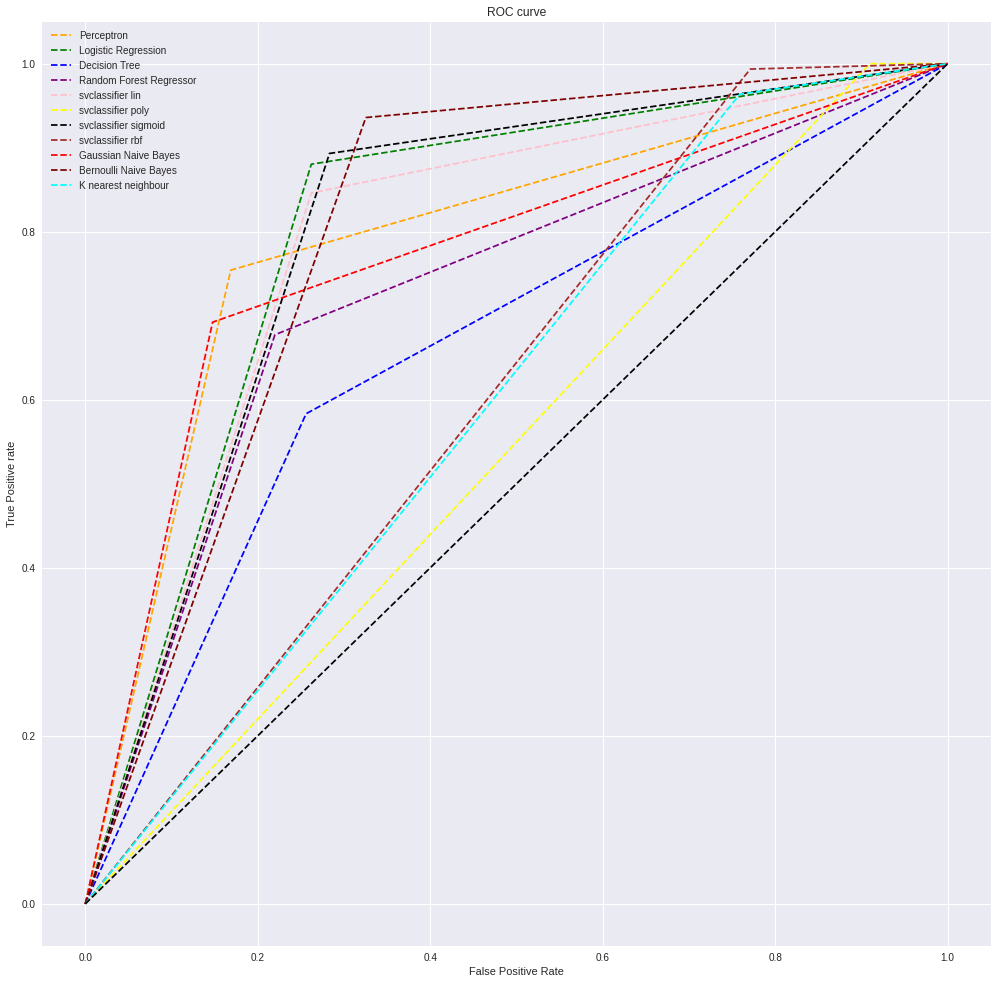

In [117]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(17, 17))

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Perceptron')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Decision Tree')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Random Forest Regressor')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='svclassifier lin')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='svclassifier poly')
plt.plot(fpr7, tpr7, linestyle='--',color='black', label='svclassifier sigmoid')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='svclassifier rbf')
#plt.plot(fpr9, tpr9, linestyle='--',color='grey', label='Multinomial Naive Bayes')
plt.plot(fpr10, tpr10, linestyle='--',color='red', label='Gaussian Naive Bayes')
plt.plot(fpr11, tpr11, linestyle='--',color='maroon', label='Bernoulli Naive Bayes')
plt.plot(fpr12, tpr12, linestyle='--',color='aqua', label='K nearest neighbour')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();

# **Comparing the Area under the curve of the models**

In [118]:
print ("{:<8} {:<30} {:<10}".format('Pos','Model','Area under curve'))
for k, v in AUC.items():
    Model, Auc = v
    print ("{:<8} {:<30} {:<10}".format(k, Model, Auc))

Pos      Model                          Area under curve
1        Perceptron                     0.7927994027391617
2        Logistic regression            0.809146843785398
3        Decision Tree                  0.6636546184738955
4        Randon Forest Classifier       0.7287354546390692
5        svm linear                     0.792052826691381
6        svm poly                       0.5451807228915663
7        svm sigmoid                    0.8050149315209557
8        svm rbf                        0.611252703120173
9        Gaussian naive bayes           0.7723586654309545
10       Bernoulli naive bayes          0.8052981155390794
11       K nearest neighbour            0.6023195345484502


# **Models and their accuracy**

In [119]:
print ("{:<8} {:<30} {:<10}".format('Pos','Model','Accuracy'))
for k, v in models.items():
    Model, Acc = v
    print ("{:<8} {:<30} {:<10}".format(k, Model, Acc))

Pos      Model                          Accuracy  
1        Perceptron                     0.78625   
2        Logistic Regression            0.82125   
3        Decision Tree                  0.65      
4        Random Forest Regressor        0.72      
5        svclassifier lin               0.80125   
6        svclassifier poly              0.6225    
7        svclassifier sigmoid           0.82      
8        svclassifier rbf               0.67625   
10       Gaussian Naive Bayes           0.75875   
11       Bernoulli Naive Bayes          0.8275    
12       K nearest neighbour            0.66375   


# **Bernoulli Naive Bayes gives the best Accuracy**